<a href="https://colab.research.google.com/github/1rd0/18lab_bek/blob/master/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%9D%D0%A1_Keras_5_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Создание сверточных сетей в Keras

---

**ФИО:** Рабдел Дмитрий Александрович
**№ варианта** 2
---

Keras

Задание: создать модель для решения задачи классификации с использованием фреймворка Keras.

В этой работе булем решать задачу классификации изображений с использованием фреймворка Keras.
В ноутбуке ниже приведен пример создания нейронной сети  для классификации картинок автосредств. (Ссылка на датасет в примере https://drive.google.com/file/d/1AQFPYEuY_rVH2aUTPP3l6lX_JPaqfdnr/view?usp=sharing )

В задании для самостоятельной разработки необходимо загрузить датасет по номеру варианта
 ###  1 вариант

https://drive.google.com/file/d/1u0QzfWlF5h6xwiPAijxHSkIv8K-Jgdvv/view?usp=sharing

 ###  2 вариант

 https://drive.google.com/file/d/1C1GpGLSYSYRk7bJMPVhrQizEmyIvJ38e/view?usp=sharing   
 для классификации марок изображений (3 класса), провести аугментацию, построить и обучить 3 архитектуры нейронной сети, выбрать лучшую, вывести архитектуру и проверить работу сети на собственных картинках.

*** ВОПРОСЫ ***

1. Для чего используется аугментация.
2. Какие параметры ImageDataGenerator вы использовали для создания обучающей выборки.
***Ваш ответ***

1. Аугментация используется в машинном обучении для увеличения разнообразия тренировочных данных путем их модификации. Это позволяет улучшить обобщающую способность модели и сделать ее более устойчивой к различным вариациям входных данных.
2.   
*   rescale
*   width_shift_range
*   rotation_range
*   zoom_range
*   brightness_range
*   shear_range
*   horizontal_flip
*   validation_split





    

In [ ]:
#
model1 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])
#

3. Выведите лучшую архитектуру нейронной сети и обьясните какие блоки вы использовали (слои).

***Ваш ответ***
 Conv2D:   сверточный слой (Convolutional Layer), который применяет

32: количество фильтров.
kernel_size=(3, 3): размер фильтров (ядра).
activation='relu': функция активации ReLU (Rectified Linear Unit).
input_shape=(150, 150, 3): размер входного изображения (150x150 пикселей, 3 канала - RGB).

MaxPooling2D:  слой подвыборки (Pooling Layer), который уменьшает размерность данных путем применения операции максимального пуллинга.

pool_size=(2, 2): размер окна пуллинга 2x2.


Dense: Полносвязный (fully connected) слой, содержащий  

64: количество нейронов.
activation='relu': функция активации ReLU.
Dense: Последний полносвязный слой, содержащий 3 нейрона (соответствующих 3 классам на выходе).










4. По графикам потерь и метрике сделайте вывод была ли модель обучена, недообучена или переобучена.

> Add blockquote


***Ваш ответ***


Found 2743 images belonging to 3 classes.
Found 684 images belonging to 3 classes.
Found 3427 images belonging to 3 classes.
Training model 1...
Epoch 1/15
86/86 [==============================] - 30s 318ms/step - loss: 1.0330 - accuracy: 0.5206 - val_loss: 0.9470 - val_accuracy: 0.5629
Epoch 2/15
86/86 [==============================] - 25s 295ms/step - loss: 0.8883 - accuracy: 0.5797 - val_loss: 0.9722 - val_accuracy: 0.5263
Epoch 3/15
86/86 [==============================] - 29s 338ms/step - loss: 0.8648 - accuracy: 0.5990 - val_loss: 0.9331 - val_accuracy: 0.5395
Epoch 4/15
86/86 [==============================] - 37s 431ms/step - loss: 0.8498 - accuracy: 0.5961 - val_loss: 0.9398 - val_accuracy: 0.5556
Epoch 5/15
86/86 [==============================] - 27s 319ms/step - loss: 0.8346 - accuracy: 0.6110 - val_loss: 0.9325 - val_accuracy: 0.5482
Epoch 6/15
86/86 [==============================] - 28s 321ms/step - loss: 0.8121 - accuracy: 0.6212 - val_loss: 0.9238 - val_accuracy: 0.56

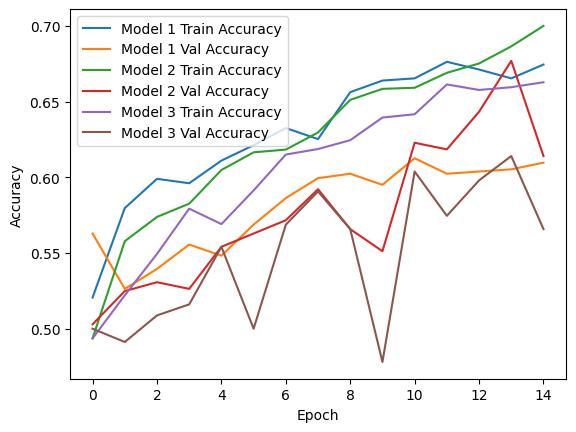

108/108 [==============================] - 6s 56ms/step - loss: 0.6798 - accuracy: 0.7155
Model 1 Test Accuracy: 0.7154945731163025
108/108 [==============================] - 5s 49ms/step - loss: 0.8860 - accuracy: 0.6163
Model 2 Test Accuracy: 0.6162824630737305
108/108 [==============================] - 6s 54ms/step - loss: 1.2168 - accuracy: 0.5477
Model 3 Test Accuracy: 0.5477093458175659


In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import zipfile
import os


data_dir = '/content/Car'

# Создание генераторов данных
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    shear_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Функция для создания и обучения модели
def create_and_train_model(model, epochs=15):
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)
    return history

# Архитектура 1
model1 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

# Архитектура 2
model2 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Архитектура 3
model3 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(3, activation='softmax')
])

# Обучение моделей и визуализация результатов
histories = []
for i, model in enumerate([model1, model2, model3], 1):
    print(f"Training model {i}...")
    history = create_and_train_model(model)
    histories.append(history)
    plt.plot(history.history['accuracy'], label=f'Model {i} Train Accuracy')
    plt.plot(history.history['val_accuracy'], label=f'Model {i} Val Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Оценка моделей на тестовой выборке
for i, model in enumerate([model1, model2, model3], 1):
    test_loss, test_acc = model.evaluate(test_generator)
    print(f"Model {i} Test Accuracy: {test_acc}")



Ширина и высота (326, 155), количество каналов 3


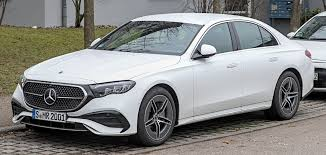

In [1]:
from PIL import Image
img = Image.open('/content/sample_data/images (2).jpeg')
print(f"Ширина и высота {img.size}, количество каналов {len(img.mode)}")
img

In [8]:
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing import image

# Открытие изображения
img = Image.open('/content/images (2).jpeg')
# Изменение размера изображения на 150x150 пикселей
img_resized = img.resize((150, 150))

# Преобразование изображения в массив numpy
img_array = image.img_to_array(img_resized)

# Нормализация значений пикселей
img_array /= 255.0

# Добавление измерения пакета (batch dimension)
img_array = np.expand_dims(img_array, axis=0)

# Загрузка изображения в модель и получение предсказания
prediction = model1.predict(img_array)
class_names = list(train_generator.class_indices.keys())

# Преобразование предсказания в читаемый формат
predicted_class_index = np.argmax(prediction)
predicted_class = class_names[predicted_class_index]

print("Предсказанный класс:", predicted_class)

1/1 [==============================] - 0s 30ms/step
Предсказанный класс: Mercedes
